# Bond Rolling Correlation Analysis
By: Cordell L. Tanny, CFA, FRM, FDP

September 7, 2024

All code is provided by Digital Hub Insights. If this code is used in your projects, please cite Digital Hub Insights as the source.

And if you like this notebook, you will love our courses.

Sign up today at [digitalhub-labs.com](https://digitalhub-labs.com) and learn everything that we know.

In [9]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

sns.set_theme()

## Retrieve Prices and Convert to Monthly Returns

In [4]:
# Retrieve the pricing data from Yahoo! Finance
start_date = '1997-01-01'
end_date = '2024-08-31'

tickers = [
    'SPY',
    'AGG',
    'IEF',
    'LQD'
]

df_prices = yf.download(tickers, start_date, end_date)['Adj Close']

# remove timezone information from the index
df_prices.index = df_prices.index.tz_localize(None)

df_prices.head()

[*********************100%***********************]  4 of 4 completed


Ticker,AGG,IEF,LQD,SPY
Date,,,,
1997-01-02,NaN,NaN,NaN,45.673794
1997-01-03,NaN,NaN,NaN,46.329292
1997-01-06,NaN,NaN,NaN,45.924435
1997-01-07,NaN,NaN,NaN,46.483543
1997-01-08,NaN,NaN,NaN,46.078667


In [7]:
# Convert to returns with common inception
df_returns = df_prices.pct_change()

# Resample to monthly
df_returns_monthly = df_returns.resample('M').last().dropna()

df_returns_monthly.head()

Ticker,AGG,IEF,LQD,SPY
Date,,,,
2003-09-30,0.005188,0.009679,0.006634,-0.009710
2003-10-31,-0.001571,0.003559,0.000000,-0.000949
2003-11-30,-0.001570,-0.006596,-0.004972,0.000752
2003-12-31,0.001381,0.001762,0.002493,0.000899
2004-01-31,0.001954,0.004580,0.002418,0.000000


## Calculate and Plot Rolling Returns

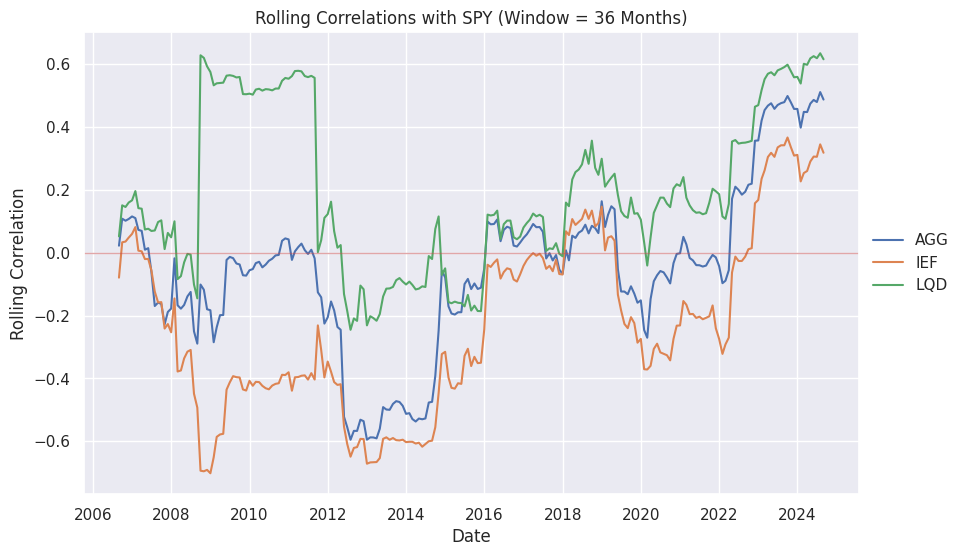

In [11]:
# Calculate rolling Correlations
def multiple_rolling_correlations(df: pd.DataFrame, ticker_of_focus: str, window: int, plot: bool = False) -> pd.DataFrame:
    """
    Calculates rolling correlations of all other tickers in the dataframe against the ticker of focus.

    Parameters:
    df (pd.DataFrame): DataFrame of monthly returns with multiple tickers as columns.
    ticker_of_focus (str): The ticker to calculate correlations against.
    window (int): The rolling window size.
    plot (bool): Option to plot the resulting correlations, default is False.

    Returns:
    pd.DataFrame: DataFrame containing the rolling correlations.
    """

    # Ensure the ticker_of_focus is in the dataframe
    if ticker_of_focus not in df.columns:
        raise ValueError(f"{ticker_of_focus} not found in the DataFrame columns")

    # Calculate rolling correlations
    rolling_corrs = pd.DataFrame()
    for ticker in df.columns:
        if ticker != ticker_of_focus:
            rolling_corrs[ticker] = df[ticker].rolling(window).corr(df[ticker_of_focus])

    # Plot if requested
    if plot:
        fig, ax = plt.subplots(figsize=(10, 6))
        for col in rolling_corrs.columns:
            sns.lineplot(data=rolling_corrs[col], ax=ax, label=col)
        ax.set_title(f'Rolling Correlations with {ticker_of_focus} (Window = {window} Months)')
        ax.set_xlabel('Date')
        ax.set_ylabel('Rolling Correlation')
        legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
        # add horizontal line at 0
        ax.axhline(y=0, color='r', linestyle='-', linewidth=1, alpha=0.5)

        plt.show()

    return rolling_corrs


rolling_corr_df = multiple_rolling_correlations(df_returns_monthly, ticker_of_focus='SPY', window=36, plot=True)

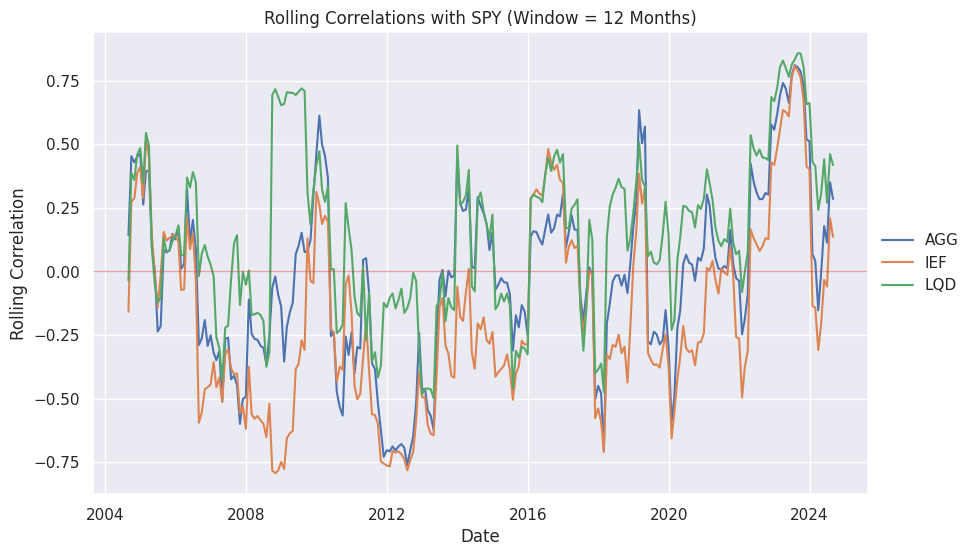

In [13]:
rolling_corr_df = multiple_rolling_correlations(df_returns_monthly, ticker_of_focus='SPY', window=12, plot=True)

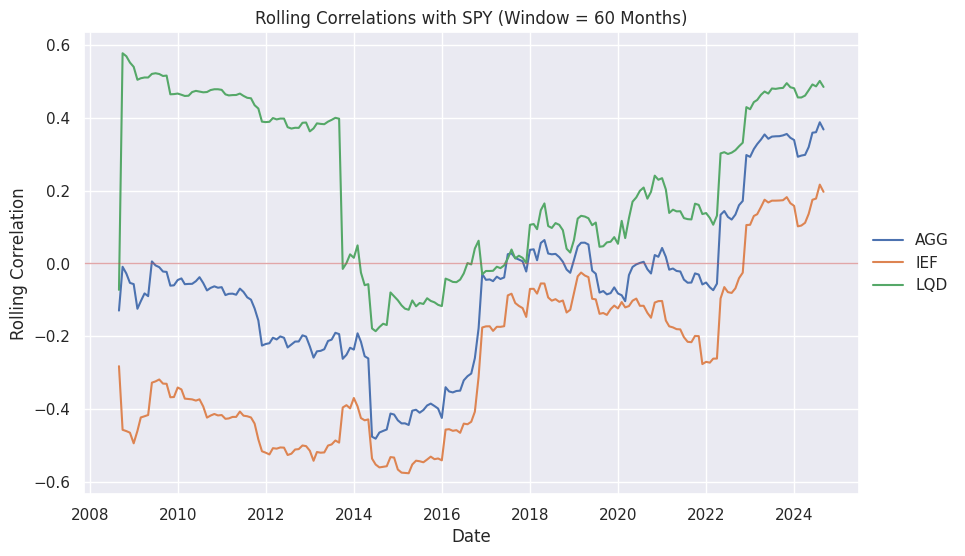

In [12]:
rolling_corr_df = multiple_rolling_correlations(df_returns_monthly, ticker_of_focus='SPY', window=60, plot=True)